# Use Case 1: Predict the Energy Star Score of Buildings
## Author : Pratik Shirbhate
## Date: 23-08-2020
### Description of use case:
This use case is about building a machine learning model to predict the energy efficiency score (the score ranges from 0 to 100)

Approch towards the solution
1. Data Exploration
2. Data Cleaning and preprocessing
3. Model Creation
4. Functions to evaluate models
5. COnclusion

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

In [2]:
df = pd.read_csv("Usecase1_Dataset.csv")

In [3]:
df.shape

(11746, 60)

In [4]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

In [5]:
df.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [6]:
df.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


Lets look at the output variable and understand its distribution

In [7]:
df.loc[:, 'ENERGY STAR Score'].head(5)

0    Not Available
1               55
2    Not Available
3    Not Available
4    Not Available
Name: ENERGY STAR Score, dtype: object

In [8]:
# Check if the output variable "ENERGY STAR SCORE" has invalid or missing values
print("There are {} missing values for dependent column".format(df['ENERGY STAR Score'].isna().sum()))

There are 0 missing values for dependent column


In [9]:
# We could see that a good number of records has "Not Available" value, lets see the percentage of those records
NA_Energy_star_score_records = df.loc[df['ENERGY STAR Score']=='Not Available', 'ENERGY STAR Score'].shape[0]/len(df)*100
print("There are {} % records with output value missing".format(round(NA_Energy_star_score_records,2)))

There are 17.91 % records with output value missing


In [10]:
# Lets remove these records from the model building
df = df.loc[df['ENERGY STAR Score']!='Not Available']

In [11]:
# Lets convert the output variable to numeric
df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'])

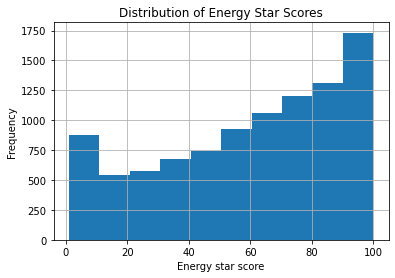

In [12]:
df['ENERGY STAR Score'].hist()
plt.xlabel("Energy star score")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Star Scores")
plt.show()

In [13]:
# Lets now look at the independent variables and remove columns such as IDs and columns which wont contribute to model
list(df.columns)

['Order',
 'Property Id',
 'Property Name',
 'Parent Property Id',
 'Parent Property Name',
 'BBL - 10 digits',
 'NYC Borough, Block and Lot (BBL) self-reported',
 'NYC Building Identification Number (BIN)',
 'Address 1 (self-reported)',
 'Address 2',
 'Postal Code',
 'Street Number',
 'Street Name',
 'Borough',
 'DOF Gross Floor Area',
 'Primary Property Type - Self Selected',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Year Built',
 'Number of Buildings - Self-reported',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural 

In [14]:
# High level intuition, could be wrong need to confirm with the business team
irrelevent_columns = ['Order', 'Property Id', 'Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits',
                      'Address 1 (self-reported)', 'Address 2', 'Street Number', 'Street Name', 'Borough', 'Release Date',
                      'Latitude', 'Longitude', 'NYC Borough, Block and Lot (BBL) self-reported', 
                      'NYC Building Identification Number (BIN)', 'DOF Benchmarking Submission Status', 'NTA']

In [15]:
df.drop(columns=irrelevent_columns, inplace=True)

In [16]:
# Lets look at the missing value percentage
# Missing values are denoted as "Not Available" in the dataset, so first replace it with np.nan
df.replace("Not Available", np.nan, inplace=True)
missing_values_dict = df.isna().sum()/len(df)*100

In [17]:
# Drop the column if the mising value percentage is greater than 75%
for col in df.columns:
    missing_percentage = missing_values_dict[col]
    if missing_percentage >= 75:
        df.drop(columns=[col], inplace=True)

In [18]:
# Lets infer the variable datatype looking at the unique vlaues 

In [19]:
df.columns

Index(['Postal Code', 'DOF Gross Floor Area',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       '

In [20]:
df.iloc[0,:]

Postal Code                                                                                   10032
DOF Gross Floor Area                                                                    3.69354e+06
Primary Property Type - Self Selected                         Hospital (General Medical & Surgical)
List of All Property Use Types at Property                    Hospital (General Medical & Surgical)
Largest Property Use Type                                     Hospital (General Medical & Surgical)
Largest Property Use Type - Gross Floor Area (ft²)                                          3889181
Year Built                                                                                     1969
Number of Buildings - Self-reported                                                              12
Occupancy                                                                                       100
Metered Areas (Energy)                                                               Whole Building


In [21]:
# Lets see the distribution of the data
# We see that numeric columns are displayed as categorical columns and vice versa
categorical_columns = ['Postal Code', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property',
                      'Largest Property Use Type', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
                      'Water Required?']
# If the column type is numeric then we plot histogram else frequency plot
for col in df.columns:
    if col in categorical_columns:
        print('{} : {}'.format(col, df[col].nunique()))

Postal Code : 266
Primary Property Type - Self Selected : 25
List of All Property Use Types at Property : 494
Largest Property Use Type : 19
Metered Areas (Energy) : 2
Metered Areas  (Water) : 5
Water Required? : 2


In [22]:
# Iterate through all the columns, convert the expected numeric columns to numeric 
# impute the mean value for missing values
for col in df.columns:
    if col in categorical_columns:
        df[col] = df[col].fillna(df[col].value_counts().index[0])
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())

Distribution of DOF Gross Floor Area


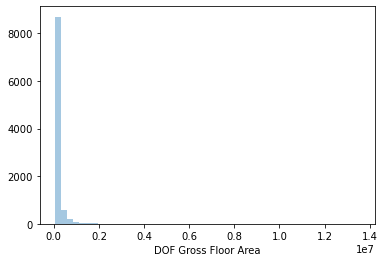

Distribution of Largest Property Use Type - Gross Floor Area (ft²)


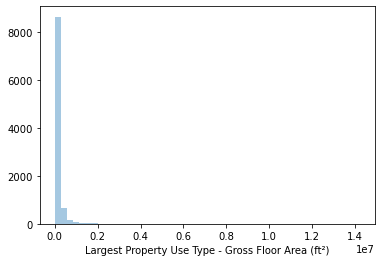

Distribution of Year Built


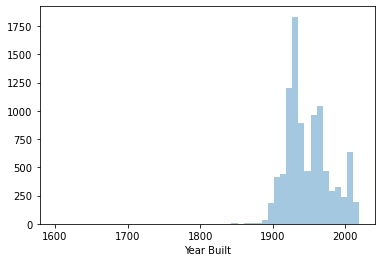

Distribution of Number of Buildings - Self-reported


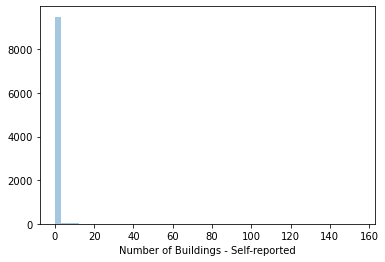

Distribution of Occupancy


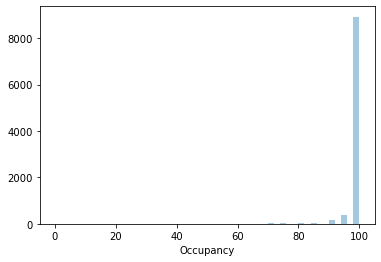

Distribution of ENERGY STAR Score


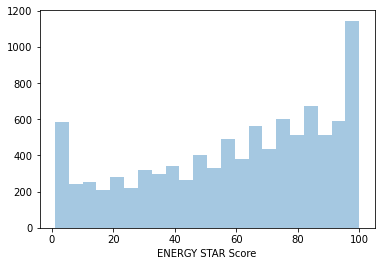

Distribution of Site EUI (kBtu/ft²)


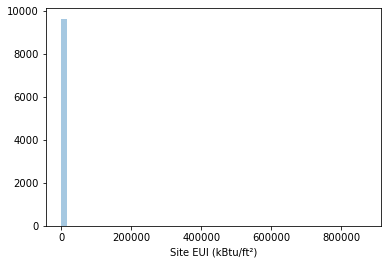

Distribution of Weather Normalized Site EUI (kBtu/ft²)


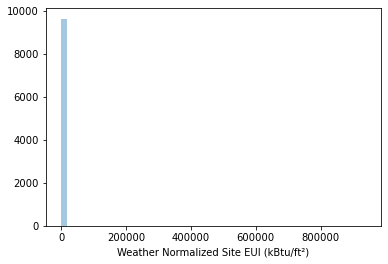

Distribution of Weather Normalized Site Electricity Intensity (kWh/ft²)


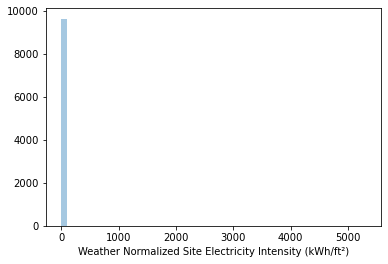

Distribution of Weather Normalized Site Natural Gas Intensity (therms/ft²)


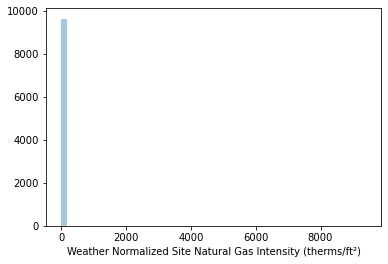

Distribution of Weather Normalized Source EUI (kBtu/ft²)


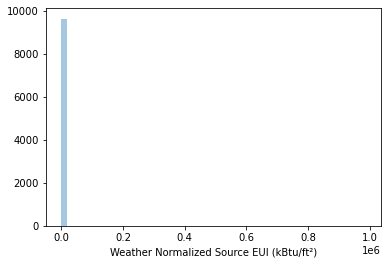

Distribution of Natural Gas Use (kBtu)


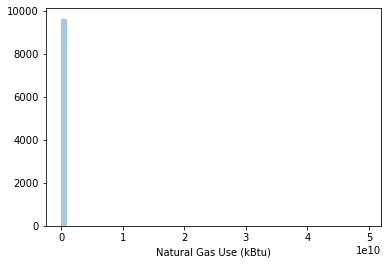

Distribution of Weather Normalized Site Natural Gas Use (therms)


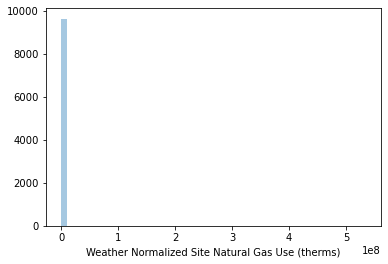

Distribution of Electricity Use - Grid Purchase (kBtu)


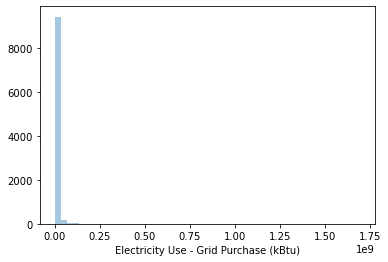

Distribution of Weather Normalized Site Electricity (kWh)


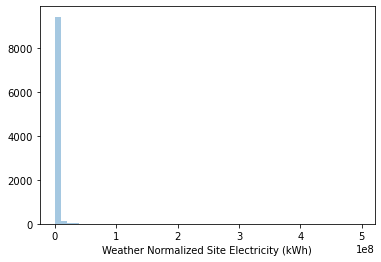

Distribution of Total GHG Emissions (Metric Tons CO2e)


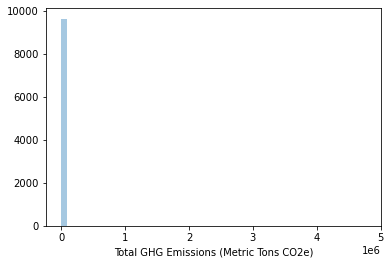

Distribution of Direct GHG Emissions (Metric Tons CO2e)


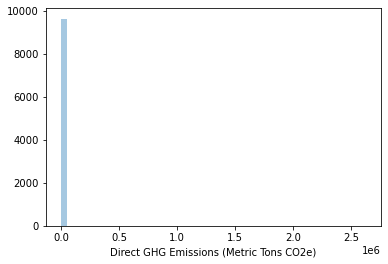

Distribution of Indirect GHG Emissions (Metric Tons CO2e)


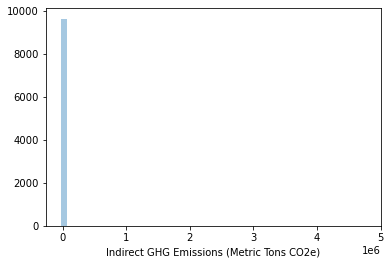

Distribution of Property GFA - Self-Reported (ft²)


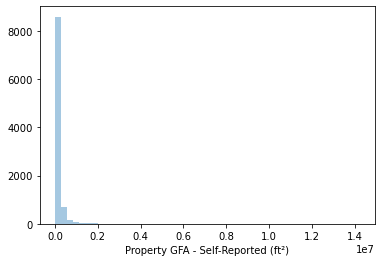

Distribution of Water Use (All Water Sources) (kgal)


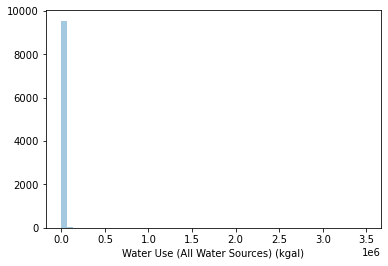

Distribution of Water Intensity (All Water Sources) (gal/ft²)


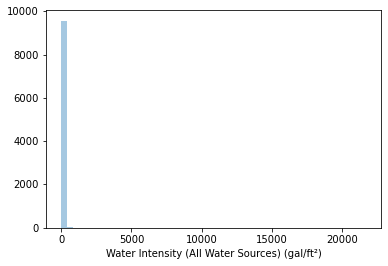

Distribution of Source EUI (kBtu/ft²)


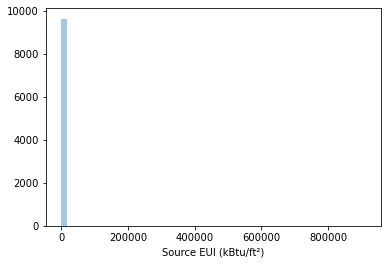

Distribution of Community Board


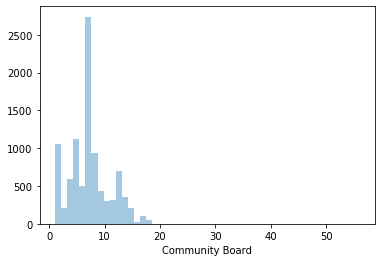

Distribution of Council District


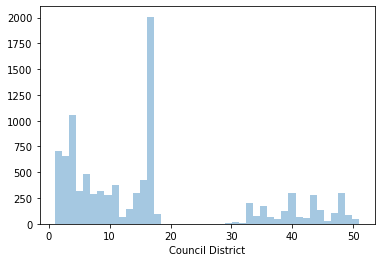

Distribution of Census Tract


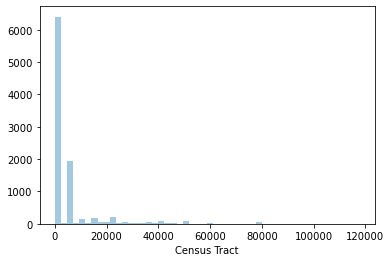

In [23]:
for col in df.columns:
    if col not in categorical_columns:
        print("Distribution of {}".format(col))
        sns.distplot(df[col], kde=False)
        plt.show()

Distribution of Postal Code
Number of uniques values for Postal Code are : 266
top 10 values are : 
 10022    230
10025    210
10016    201
11226    192
10024    190
10463    187
10001    184
10019    183
11375    180
10467    178
Name: Postal Code, dtype: int64 
 



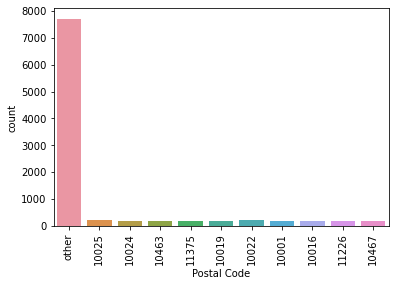

Distribution of Primary Property Type - Self Selected
Number of uniques values for Primary Property Type - Self Selected are : 25
top 10 values are : 
 Multifamily Housing                      7524
Office                                   1167
Hotel                                     212
Non-Refrigerated Warehouse                149
Residence Hall/Dormitory                   97
Senior Care Community                      90
K-12 School                                79
Distribution Center                        62
Retail Store                               62
Hospital (General Medical & Surgical)      41
Name: Primary Property Type - Self Selected, dtype: int64 
 



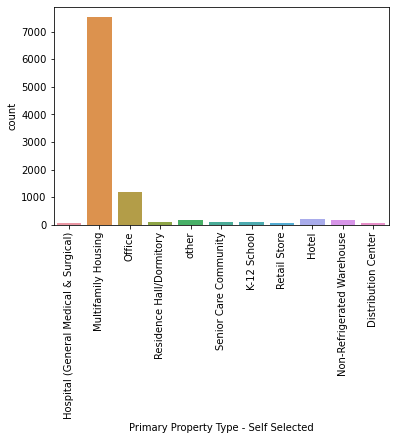

Distribution of List of All Property Use Types at Property
Number of uniques values for List of All Property Use Types at Property are : 494
top 10 values are : 
 Multifamily Housing                  6022
Office                                531
Multifamily Housing, Parking          426
Multifamily Housing, Retail Store     221
Multifamily Housing, Other            171
Hotel                                 170
Office, Retail Store                  165
Non-Refrigerated Warehouse            114
Senior Care Community                  86
K-12 School                            85
Name: List of All Property Use Types at Property, dtype: int64 
 



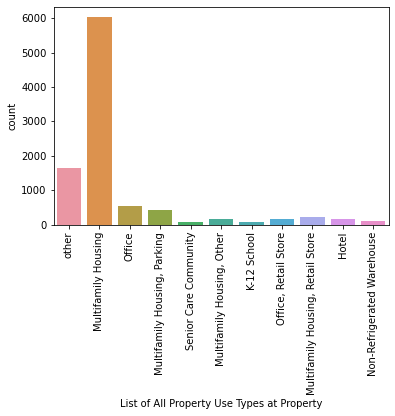

Distribution of Largest Property Use Type
Number of uniques values for Largest Property Use Type are : 19
top 10 values are : 
 Multifamily Housing                      7529
Office                                   1193
Hotel                                     215
Non-Refrigerated Warehouse                159
K-12 School                                98
Residence Hall/Dormitory                   97
Senior Care Community                      92
Retail Store                               64
Distribution Center                        62
Hospital (General Medical & Surgical)      41
Name: Largest Property Use Type, dtype: int64 
 



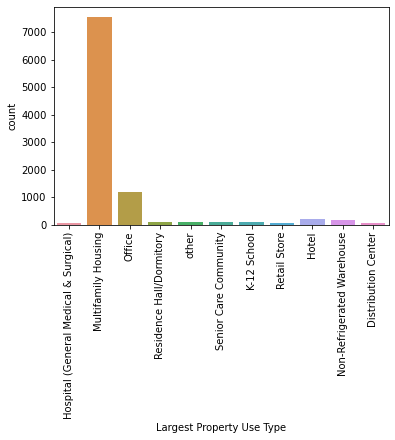

Distribution of Metered Areas (Energy)
Number of uniques values for Metered Areas (Energy) are : 2
top 10 values are : 
 Whole Building           9626
Another configuration      16
Name: Metered Areas (Energy), dtype: int64 
 



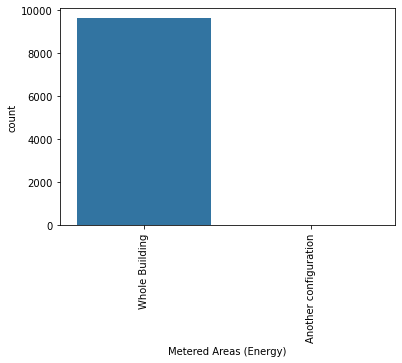

Distribution of Metered Areas  (Water)
Number of uniques values for Metered Areas  (Water) are : 5
top 10 values are : 
 Whole Building                            9627
Combination of common and tenant areas       8
Common areas only                            4
Tenant areas only                            2
Another configuration                        1
Name: Metered Areas  (Water), dtype: int64 
 



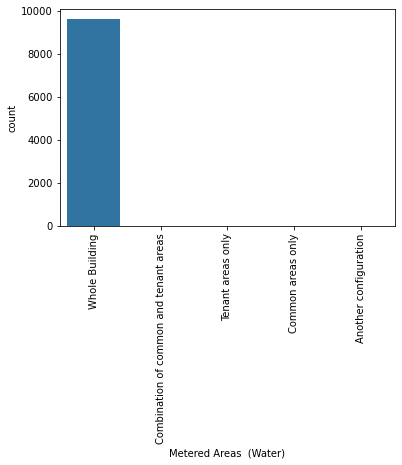

Distribution of Water Required?
Number of uniques values for Water Required? are : 2
top 10 values are : 
 Yes    6324
No     3318
Name: Water Required?, dtype: int64 
 



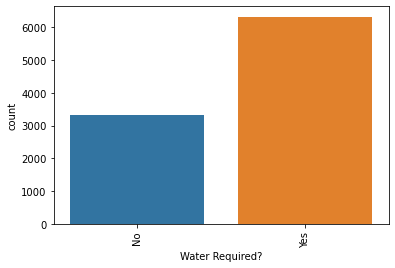

In [24]:
for col in categorical_columns:
    print("Distribution of {}".format(col))
    print("Number of uniques values for {} are : {}".format(col, df[col].nunique()))
    top10_values = df[col].value_counts()[:10]
    top10_values_list = df[col].value_counts()[:10].index.tolist()
    print("top 10 values are : \n {} \n \n".format(top10_values))
    if df[col].nunique() > 10:
        df.loc[~df[col].isin(top10_values_list), col]='other'
    chart = sns.countplot(x=col, data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [25]:
df_processed = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [26]:
y = df_processed.loc[:,['ENERGY STAR Score']]
X = df_processed.drop(columns=['ENERGY STAR Score'])

In [27]:
# Now we have processed data and we can now build and train machine learning models

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [30]:
%%time
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
# Lets look at the distrubution of y_pred
# Ideally all values should lie between 0 and 100
print("Percentage of records predicted less than 0 : {}".format(100*sum(y_pred<0)/len(y_pred)))
print("Percentage of records predicted greater than 100 {}".format(100*sum(y_pred>100)/len(y_pred)))
y_pred[y_pred<0]=0
y_pred[y_pred>100]=100


Percentage of records predicted less than 0 : [0.37712131]
Percentage of records predicted greater than 100 [0.03142678]
Wall time: 32 ms


In [31]:
def get_model_accuracy(y_test, y_pred):
    """Function to calculate mean absolute error, r2 and print the distribution of y_pred and y_test
    
    Args:
        y_test (np.array): 1 dimensional array of actual numeric values
        y_pred (np.array): 1 dimensional array of predicted numeric values
        
    Returns:
        (rmse, mae, r2): Tuple of error metric values
    
    """
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Root Mean Square Error : {}".format(rmse))
    print("Mean Absolute Error : {}".format(mae))
    print("R2 value : {}".format(r2))
    # Visualize distribution of y_test and y_pred
    plt.hist(y_test.values, label='Actual Values')
    plt.hist(y_pred, color='red', alpha=0.5, label='Predicted Values')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Distribution of actual and predicted values')
    plt.show()
    return (rmse, mae, r2)

Root Mean Square Error : 27.174656804880428
Mean Absolute Error : 22.554487083870562
R2 value : 0.19990797271490057


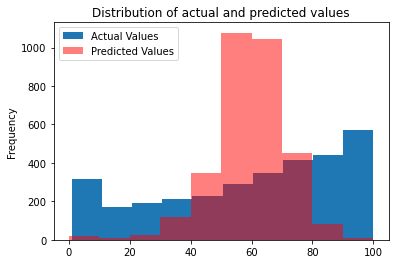

(27.174656804880428, 22.554487083870562, 0.19990797271490057)

In [32]:
get_model_accuracy(y_test, y_pred)

#### LR Modeol performance
- Looks like linear regression model failed to performed well
- looking at the overlap between actual values and predicted values on test dataset, its evident that predictions of LR model is normally distributed.

- From the initial data exploration we can see that most of the variables are not normally/ uniformly distributed.
- There are outliers available in most of the features and these outliers affected the LR model. 

- These outliers can be handled appropriately with robust tree based model such as GradientBoostingRegressor



D:\Users\PShirbhate\AppData\Local\Continuum\anaconda3\envs\jet2tt_env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Percentage of records predicted less than 0 : 0.4714016341923319
Percentage of records predicted greater than 100 0.9113764927718416
Root Mean Square Error : 13.276669185564117
Mean Absolute Error : 9.342900824069519
R2 value : 0.8090190387131438


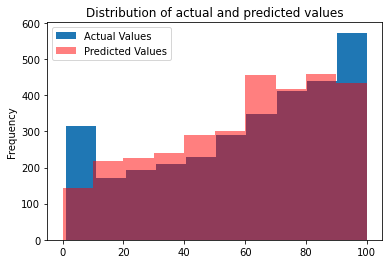

Wall time: 4.15 s


In [33]:
%%time
# Lets try with some robust model

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
print("Percentage of records predicted less than 0 : {}".format(100*sum(y_pred<0)/len(y_pred)))
print("Percentage of records predicted greater than 100 {}".format(100*sum(y_pred>100)/len(y_pred)))
y_pred[y_pred<0]=0
y_pred[y_pred>100]=100
get_model_accuracy(y_test, y_pred)

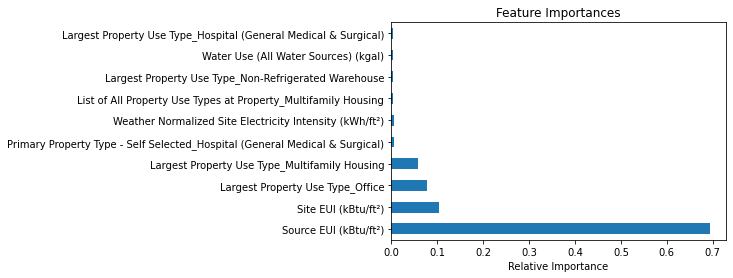

In [34]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.show()

In [35]:
# Lets look at the these values interms of classification model perspective
def assign_score_category(score):
    if score > 85:
        cat = 'A'
    elif score > 70:
        cat = 'B'
    elif score > 55:
        cat = 'C'
    elif score <= 55:
        cat = 'D'
    else:
        cat = 'Not Covereed'
    return cat

In [36]:
y_test_cats = y_test['ENERGY STAR Score'].apply(assign_score_category)

In [37]:
y_pred_cats = pd.DataFrame(y_pred)[0].apply(assign_score_category)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_cats, y_pred_cats)

0.7042740414833438

### Conclusion - 
 - Gradient Boost Regressor model is fairely good with **mean aboslute errro of 9**, **R2 score of 0.8** and **accuracy of 70%**
 - This model can be tuned further using hyperparameter tuning
 - The model parameters and significance need to be verified by business